SANMATHI PRIYA K R
20MIS0363


In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [126]:
df = pd.read_csv('/content/sample_data/Mall_Customers_.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


1) Understand the data


*   Every customer has unique id
*   Customers if spends less amount then the spending score is less.


*   Customers spending score is determined based on their gender and anuual income
*   we can use the gender,annual income, spending score to analyse who spends more and based on that we can lauch products in market which makes the most sale.

2)Data preprocessing






In [127]:
df.shape

(200, 5)

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


We need two columns anual income and spending score to analyse the customer segmentation

In [129]:
X = df.iloc[: , [3,4]].values

In [130]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [131]:
from sklearn.cluster import KMeans
error =[]

In [132]:
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(features_for_clustering_scaled)
    error.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [133]:
error

[600.0,
 315.6877752583757,
 189.01659831006333,
 140.3191939022259,
 115.83060632072049,
 95.2978779291986,
 79.63105929549805,
 66.29537787448234,
 58.69091471298836,
 53.11944386128917]

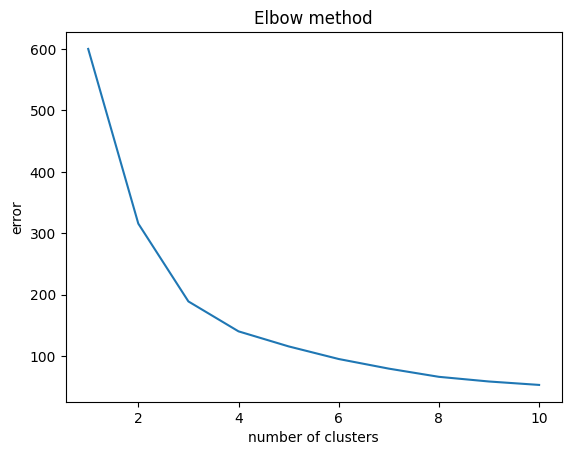

In [134]:

plt.plot(range(1,11),error)
plt.title('Elbow method')
plt.xlabel('number of clusters')
plt.ylabel('error')
plt.show()

In [171]:
kmeansmodel = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0)

In [147]:
y_kmeans = kmeansmodel.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [160]:
kmeans.cluster_centers_

array([[ 0.7522968 , -0.45332626,  0.5549835 ],
       [-0.09375784,  0.5224927 , -0.06120385],
       [-0.27809386,  1.88866005, -0.22918622],
       [ 1.66278956, -0.16865172,  2.42146859],
       [-1.51061462, -0.78208604, -1.54088168],
       [-1.08932296,  0.97181459, -1.00880142],
       [ 0.96624899,  0.89247005,  0.78290952],
       [ 0.07534515, -1.18415038,  0.06641481],
       [ 1.35817073, -0.30126408,  1.25481169],
       [-0.91020408, -0.94373197, -0.80384818]])

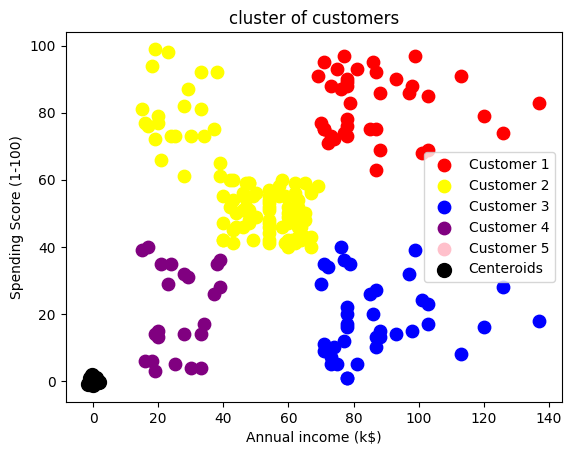

In [170]:

plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1], s= 80, c ="red", label='Customer 1')
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1], s= 80, c ="yellow", label='Customer 2')
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1], s= 80, c ="blue", label='Customer 3')
plt.scatter(X[y_kmeans == 3,0], X[y_kmeans == 3,1], s= 80, c ="purple", label='Customer 4')
plt.scatter(X[y_kmeans == 4,0], X[y_kmeans == 4,1], s= 80, c ="pink", label='Customer 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s =100, c = 'black' , label = 'Centeroids')
plt.title('cluster of customers')
plt.xlabel('Annual income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

As the cluster formed is in yellow, customers from the yellow has high annual income aswell as high spending rate , so we can target yellow range customer to sell or launch products.